# ¿Se ven afectados los puntajes en el ICFES por el acceso a internet?

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/Users/Daniel\Desktop/programación/IntrodIngSistemasAnalíticaDeDatos/Resultados__nicos_Saber_11_20250316.csv')
# df = pd.read_csv('https://www.datos.gov.co/resource/kgxf-xxbe.csv')

## Histograma de Puntajes según Acceso a Internet

C:\Users\Daniel\AppData\Local\Temp\ipykernel_99864\3212408681.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab10', len(categorias))


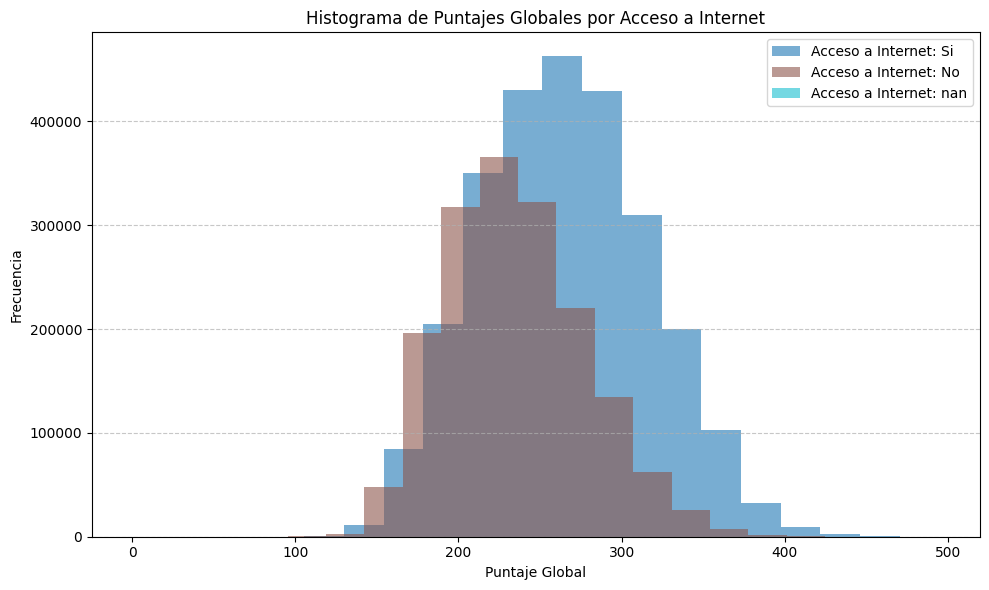

In [ ]:
df_filtrado = df[df['PUNT_GLOBAL'] > 0]

categorias = df_filtrado['FAMI_TIENEINTERNET'].unique()
colores = plt.cm.get_cmap('tab10', len(categorias))

plt.figure(figsize=(10, 6))

for i, categoria in enumerate(categorias):
    datos = df_filtrado[df_filtrado['FAMI_TIENEINTERNET'] == categoria]['PUNT_GLOBAL']
    plt.hist(datos, bins=20, alpha=0.6, color=colores(i), label=f'Acceso a Internet: {categoria}')

plt.title('Histograma de Puntajes Globales por Acceso a Internet')
plt.xlabel('Puntaje Global')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Puntaje Global en Diagrama de Cajas

C:\Users\Daniel\AppData\Local\Temp\ipykernel_99864\1533816336.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FAMI_TIENEINTERNET', y='PUNT_GLOBAL', data=df_filtrado, palette="Set2")


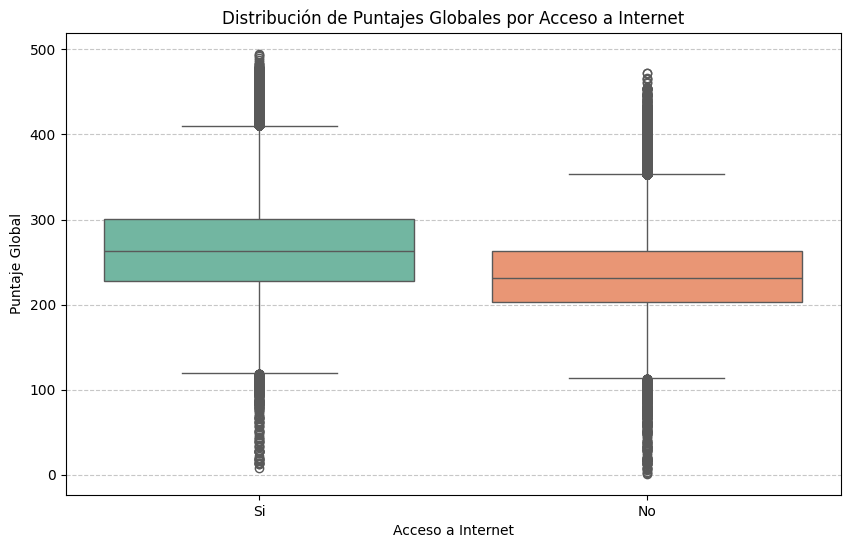

In [ ]:
df_filtrado = df[df['PUNT_GLOBAL'] > 0]

plt.figure(figsize=(10, 6))
sns.boxplot(x='FAMI_TIENEINTERNET', y='PUNT_GLOBAL', data=df_filtrado, palette="Set2")

plt.title('Distribución de Puntajes Globales por Acceso a Internet')
plt.xlabel('Acceso a Internet')
plt.ylabel('Puntaje Global')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Gráfica de Violines

C:\Users\Daniel\AppData\Local\Temp\ipykernel_99864\2139380147.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FAMI_TIENEINTERNET', y='PUNT_GLOBAL', data=df_filtrado, palette="muted")


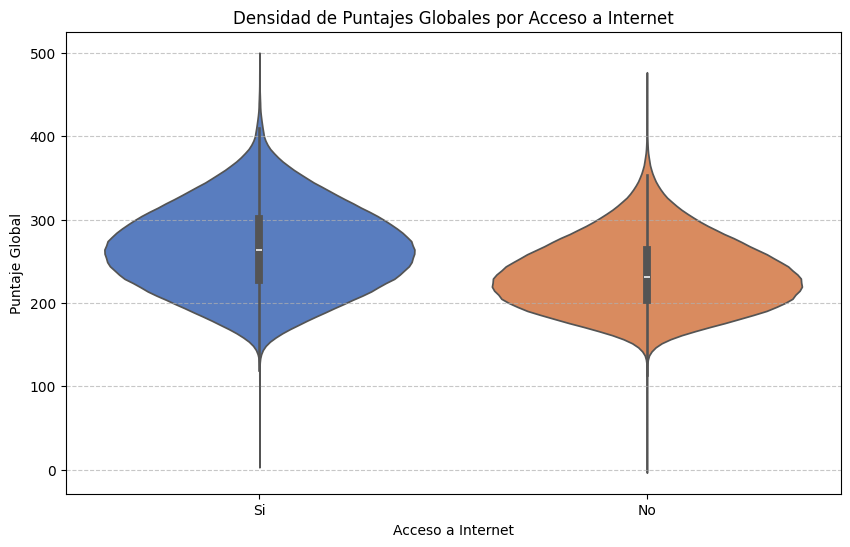

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='FAMI_TIENEINTERNET', y='PUNT_GLOBAL', data=df_filtrado, palette="muted")

plt.title('Densidad de Puntajes Globales por Acceso a Internet')
plt.xlabel('Acceso a Internet')
plt.ylabel('Puntaje Global')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Promedio de Puntaje por Acceso Internet

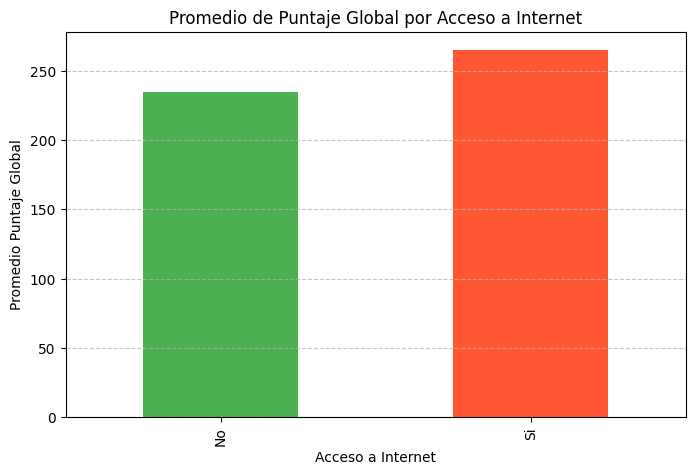

In [ ]:
df_mean = df_filtrado.groupby('FAMI_TIENEINTERNET')['PUNT_GLOBAL'].mean()

plt.figure(figsize=(8, 5))
df_mean.plot(kind='bar', color=['#4CAF50', '#FF5733', '#2196F3'])

plt.title('Promedio de Puntaje Global por Acceso a Internet')
plt.xlabel('Acceso a Internet')
plt.ylabel('Promedio Puntaje Global')
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Frecuencia de Acceso a Internet por Departamento

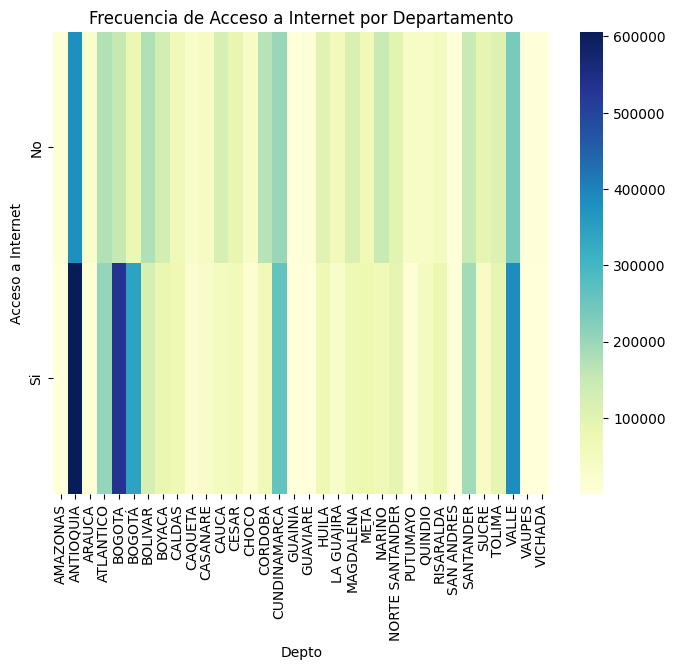

In [ ]:
tabla = df.groupby(['COLE_DEPTO_UBICACION', 'FAMI_TIENEINTERNET']).size().unstack()

plt.figure(figsize=(8, 6))
sns.heatmap(tabla.T, fmt="d", cmap="YlGnBu")

plt.title('Frecuencia de Acceso a Internet por Departamento')
plt.ylabel('Acceso a Internet')
plt.xlabel('Depto')
plt.show()

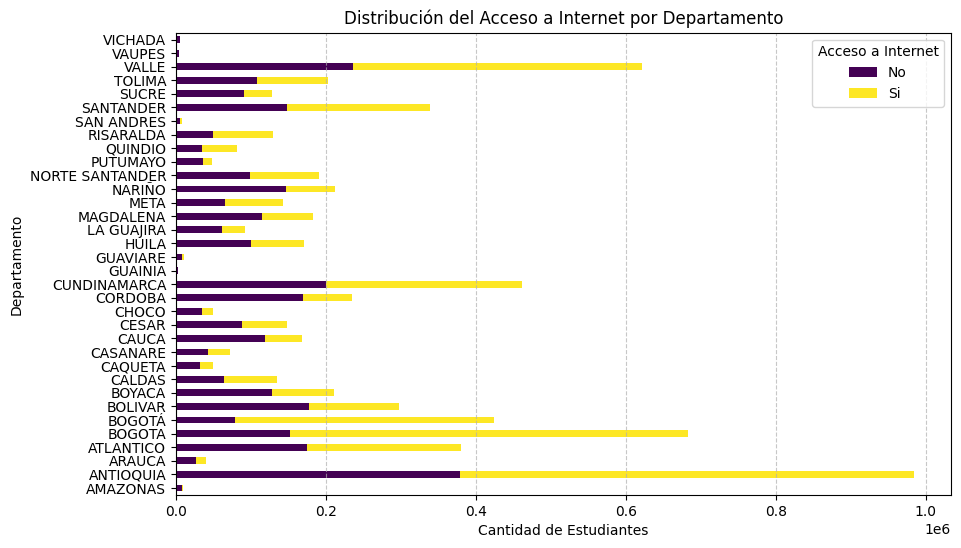

In [ ]:
tabla = df.groupby(['COLE_DEPTO_UBICACION', 'FAMI_TIENEINTERNET']).size().unstack()

tabla.plot(kind='barh', stacked=True, figsize=(10, 6), colormap="viridis")

plt.title('Distribución del Acceso a Internet por Departamento')
plt.ylabel('Departamento')
plt.xlabel('Cantidad de Estudiantes')
plt.legend(title='Acceso a Internet')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## ¿El acceso a internet influye en el puntaje global?  

El análisis de los datos revela que la mediana de los puntajes de los estudiantes con acceso a internet es aproximadamente **20 puntos superior** a la de aquellos que no cuentan con este recurso, una diferencia que también se refleja en los valores promedio.  

Este hallazgo sugiere que el **acceso a internet está asociado con una mayor probabilidad de obtener puntajes más altos**. Esto puede deberse al acceso a una mayor cantidad de información y recursos educativos en línea, entre otros factores. Sin embargo, es importante considerar que el acceso a internet también está relacionado con el estrato socioeconómico y la ubicación geográfica, lo que indica que la brecha en los puntajes no se debe exclusivamente a la conectividad, sino a **desigualdades estructurales más amplias**.  

Esta relación se hace aún más evidente al observar que el acceso a internet es significativamente menor en regiones con **baja densidad poblacional**. Por lo tanto, aunque el internet juega un papel en la diferencia de puntajes globales, su impacto debe analizarse en conjunto con otros factores como la **pobreza, el estrato socioeconómico y la región de residencia**, que en conjunto determinan las condiciones de vida y el acceso a oportunidades educativas.